<a href="https://colab.research.google.com/github/AYUSH-11/Machine-Learning/blob/main/LHC3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive  #to import Google drive data
drive.mount('/content/drive') #to the drive data into colab cloud and enter the activation colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/"My Drive/Colab Notebooks/LHC"

/content/drive/My Drive/Colab Notebooks/LHC


In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dataset.shape

(200, 5)

# Task 1

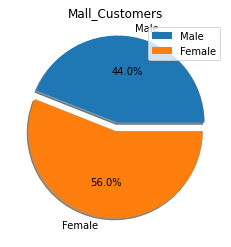

In [8]:
male = dataset[dataset['Genre']=='Male']
female = dataset[dataset['Genre']=='Female']

plt.pie([len(male),len(female)],labels=['Male','Female'],
        explode=(0.1,0),shadow=True,autopct='%1.1f%%')
plt.title("Mall_Customers")
plt.legend()
plt.show()

# Test 2

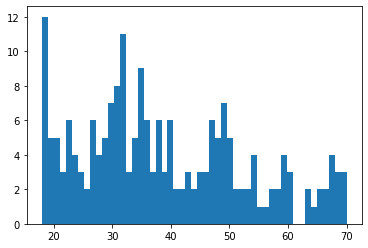

In [9]:
plt.hist(dataset['Age'],bins=51)
plt.show()

# Task 3

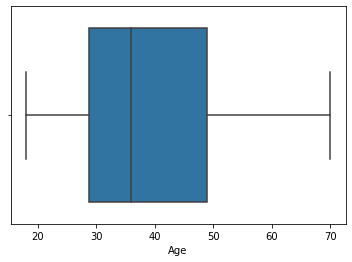

In [10]:
sns.boxplot(x=dataset["Age"])

# Task 4

In [11]:
max_income = max(dataset['Annual Income (k$)'])

In [12]:
max_income

137

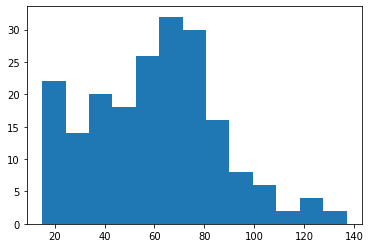

In [13]:
plt.hist(dataset['Annual Income (k$)'],bins=13)
plt.show()

# Task 5

In [14]:
max_spending = max(dataset['Spending Score (1-100)'])

In [15]:
max_spending

99

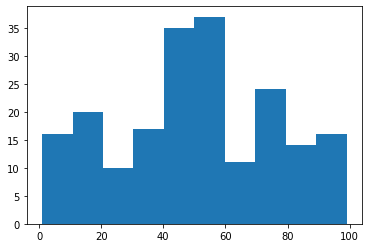

In [16]:
plt.hist(dataset['Spending Score (1-100)'],bins=10)
plt.show()

# Task 6

In [17]:
from sklearn.cluster import KMeans

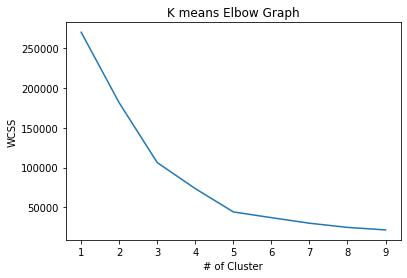

In [18]:
data = dataset.iloc[:, [3, 4]].values
wcss=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)        #residual values which we are having.
plt.plot(range(1,10),wcss)
plt.title('K means Elbow Graph')
plt.xlabel('# of Cluster')
plt.ylabel('WCSS')
plt.show()

In [19]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(data)

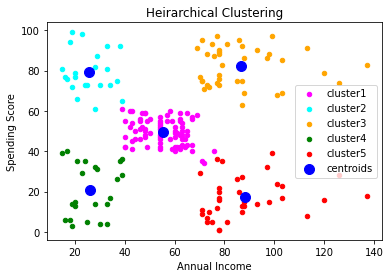

In [20]:
#visualize the Cluster
plt.scatter(data[y_kmeans==0,0],data[y_kmeans==0,1],s=20,c='magenta',label='cluster1')
plt.scatter(data[y_kmeans==1,0],data[y_kmeans==1,1],s=20,c='cyan',label='cluster2')
plt.scatter(data[y_kmeans==2,0],data[y_kmeans==2,1],s=20,c='orange',label='cluster3')
plt.scatter(data[y_kmeans==3,0],data[y_kmeans==3,1],s=20,c='green',label='cluster4')
plt.scatter(data[y_kmeans==4,0],data[y_kmeans==4,1],s=20,c='red',label='cluster5')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='blue',label='centroids')

plt.title('Heirarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()  
plt.show()